# Poker Hand Data Set 

### Relevant Information:

Each record is an example of a hand consisting of five playing
cards drawn from a standard deck of 52. Each card is described
using two attributes (suit and rank), for a total of 10 predictive
attributes. There is one Class attribute that describes the
�Poker Hand�. The order of cards is important, which is why there
are 480 possible Royal Flush hands as compared to 4 (one for each
suit � explained in more detail below).

### Statistics:

| | | | |
| - | - | - | - |
| Poker Hand       | # of hands	| Probability	| # of combinations
| Royal Flush      | 4		| 0.00000154	| 480
| Straight Flush   | 36		| 0.00001385	| 4320
| Four of a kind   | 624		| 0.0002401	| 74880
| Full house       | 3744		| 0.00144058	| 449280
| Flush            | 5108		| 0.0019654	| 612960
| Straight         | 10200		| 0.00392464	| 1224000
| Three of a kind  | 54912		| 0.02112845	| 6589440
| Two pairs        | 123552		| 0.04753902	| 14826240
| One pair         | 1098240	| 0.42256903	| 31788800
| Nothing          | 1302540	| 0.50117739	| 156304800
| | | | |
| Total            | 2598960	| 1.0		| 311875200

# Preprocessing Data

In [1]:
import numpy as np
import pandas as pd

import keras
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dense, LeakyReLU, Embedding, LSTM
from keras.models import Model
from keras.utils import plot_model
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in [0,9,13]:
    si = plt.style.available[i]
    plt.style.use(si)

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path = '../data/Poker/poker-hand-training-true.data'
df = pd.read_csv(path, names=['s1', 'c1', 's2', 'c2', 's3', 'c3', 's4', 'c4', 's5', 'c5', 'label'])

In [3]:
df.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [43]:
def categorazer(df):
    data = to_categorical(df)
    cat = []
    for si in data:
        sj = [list(si[2*j][:4])+list(si[2*j+1])  for j in range(5)]
        cat.append(sj)
    return np.array(cat)

In [44]:
x_train = categorazer(df[df.columns[:-1]])
y_train = to_categorical(df[df.columns[-1]])
x_train[0], y_train[0]

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [47]:
# encode test data
df_test = pd.read_csv('../data/Poker/poker-hand-testing.data')
x_test = categorazer(df_test[df_test.columns[:-1]])
y_test = to_categorical(df_test[df_test.columns[-1]])
x_test[0], y_test[0]

(array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.]], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

# MLP Model

In [48]:
shape0, shape1 = x_train.shape[1:]
shape0, shape1

(5, 18)

In [49]:
tf.reset_default_graph()

In [50]:
inputs = Input(shape=(shape0, shape1, ))
# a layer instance is callable on a tensor, and returns a tensor
x = Flatten()(inputs)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dense(16)(x)
x = LeakyReLU()(x)
x = Dense(16)(x)
x = LeakyReLU()(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)

In [51]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.summary()
# plot_model(model, to_file='model.png')
# plt.figure(figsize=(10,10))
# img=mpimg.imread('model.png')
# imgplot = plt.imshow(img)
# plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5, 18)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2912      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
__________

In [55]:
# history = model.fit(x_train, y_train,
#                     validation_data=(x_test,y_test),
#                     epochs=25, 
#                     batch_size=32,)  # starts training

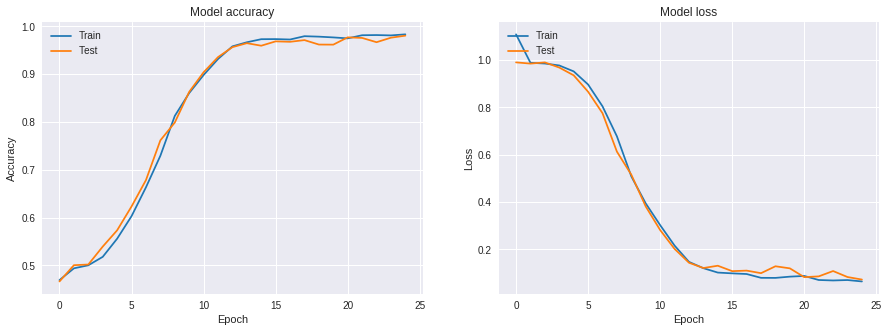

In [13]:
plt.figure(figsize=(15,5))


# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Validation

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
y_pred = model.predict(x_test)
y_pred, y_test

(array([[1.5241175e-06, 9.9366909e-01, 6.3021616e-03, ..., 4.5303924e-13,
         3.1946552e-06, 6.7879760e-06],
        [5.1404800e-06, 9.9978322e-01, 1.6282928e-04, ..., 6.5292582e-16,
         8.1274611e-06, 1.2723549e-05],
        [5.2917826e-06, 9.9976879e-01, 1.9344791e-04, ..., 3.8154798e-16,
         6.5309159e-06, 9.3866247e-06],
        ...,
        [5.0866597e-06, 9.9995458e-01, 8.0154923e-06, ..., 1.8250005e-18,
         5.6522781e-06, 1.1734421e-05],
        [4.9981062e-04, 9.9876189e-01, 7.7797660e-07, ..., 1.5935499e-19,
         8.9065492e-05, 1.6705754e-04],
        [3.5560704e-10, 1.0519914e-02, 9.8127168e-01, ..., 1.7540741e-07,
         1.4342019e-08, 1.7451862e-08]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32))

In [16]:
matrix = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
matrix

,0,1,2,3,4,5,6,7,8,9
0,499344,1864,0,0,0,0,0,0,0,0
1,1303,419522,1673,0,0,0,0,0,0,0
2,0,3548,41898,2176,0,0,0,0,0,0
3,0,0,1507,19603,0,0,11,0,0,0
4,3613,272,0,0,0,0,0,0,0,0
5,1987,9,0,0,0,0,0,0,0,0
6,0,0,0,1111,0,0,288,25,0,0
7,0,0,0,4,0,0,121,105,0,0
8,10,2,0,0,0,0,0,0,0,0
9,1,2,0,0,0,0,0,0,0,0


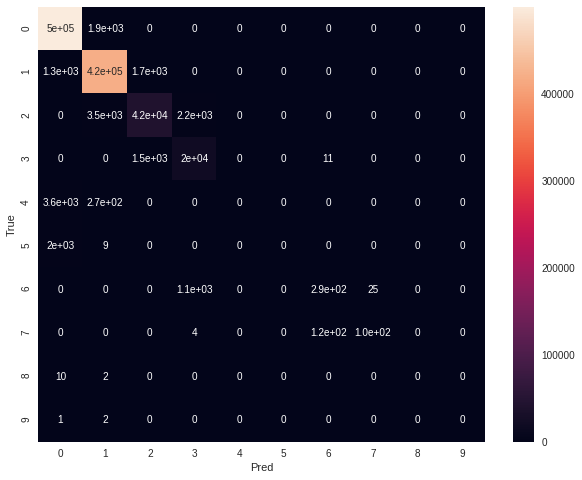

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(matrix,  annot=True)
plt.ylabel('True')
plt.xlabel('Pred');